https://myoptimizationnotes.blogspot.com/2024/02/project-with-uncertain-activity-time.html 

In [56]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create the directed graph for the project activities
G = nx.DiGraph()

In [57]:
df1=pd.DataFrame({'activities':['A','B','C','D','E','F','G','H','I','J'],
     'description':['Develop Product Design','Plan Market Research','Prepare routing ( manufacturing engineering',
                   'Build Prototype Model','Prepare marketing brochure','Prepare cost Estimates ( Industrial Engineering)',
                    'Do Preliminary Product Testing','Complete Market Survey','Prepare pricing and forecast report',
                    'Prepare final Report'],
     'predecessors':[np.nan,np.nan,'A','A','A','C','D',['B','E'],'H',['F','G','I']],
     'Optimistic(a)':[4,1,2,3,2,1.5,1.5,2.5,1.5,1],
     'Most Probable(m)':[5,1.5,3,4,3,2,3,3.5,2,2],
     'Pessimistic(b)':[12,5,4,11,4,2.5,4.5,7.5,2.5,3]})
df1

,activities,description,predecessors,Optimistic(a),Most Probable(m),Pessimistic(b)
0,A,Develop Product Design,NaN,4.0,5.0,12.0
1,B,Plan Market Research,NaN,1.0,1.5,5.0
2,C,Prepare routing ( manufacturing engineering,A,2.0,3.0,4.0
3,D,Build Prototype Model,A,3.0,4.0,11.0
4,E,Prepare marketing brochure,A,2.0,3.0,4.0
5,F,Prepare cost Estimates ( Industrial Engineering),C,1.5,2.0,2.5
6,G,Do Preliminary Product Testing,D,1.5,3.0,4.5
7,H,Complete Market Survey,"[B, E]",2.5,3.5,7.5
8,I,Prepare pricing and forecast report,H,1.5,2.0,2.5
9,J,Prepare final Report,"[F, G, I]",1.0,2.0,3.0


In [58]:
df1['time']=(df1['Optimistic(a)']+4*df1['Most Probable(m)']+df1['Pessimistic(b)'])/6
df1['Variance'] = (((df1['Pessimistic(b)']-df1['Optimistic(a)'])/6)**2).round(2)
df1

,activities,description,predecessors,Optimistic(a),Most Probable(m),Pessimistic(b),time,Variance
0,A,Develop Product Design,NaN,4.0,5.0,12.0,6.0,1.78
1,B,Plan Market Research,NaN,1.0,1.5,5.0,2.0,0.44
2,C,Prepare routing ( manufacturing engineering,A,2.0,3.0,4.0,3.0,0.11
3,D,Build Prototype Model,A,3.0,4.0,11.0,5.0,1.78
4,E,Prepare marketing brochure,A,2.0,3.0,4.0,3.0,0.11
5,F,Prepare cost Estimates ( Industrial Engineering),C,1.5,2.0,2.5,2.0,0.03
6,G,Do Preliminary Product Testing,D,1.5,3.0,4.5,3.0,0.25
7,H,Complete Market Survey,"[B, E]",2.5,3.5,7.5,4.0,0.69
8,I,Prepare pricing and forecast report,H,1.5,2.0,2.5,2.0,0.03
9,J,Prepare final Report,"[F, G, I]",1.0,2.0,3.0,2.0,0.11


In [59]:
activities = {}
for index, row in df1.iterrows():
    activity = row['activities']
    # Initialize dictionary entry with basic information
    activity_entry = {
        'description': row['description'],
        'time': row['time']
    }
    
    # Check for NaN in predecessors column
    if isinstance(row['predecessors'], list):
        # Directly assign if it's a list
        activity_entry['predecessors'] = row['predecessors']
    elif pd.notnull(row['predecessors']):
        # Wrap in list if it's a single non-NaN value
        activity_entry['predecessors'] = [row['predecessors']]
    
    activities[activity] = activity_entry
activities

{'A': {'description': 'Develop Product Design', 'time': 6.0},
 'B': {'description': 'Plan Market Research', 'time': 2.0},
 'C': {'description': 'Prepare routing ( manufacturing engineering',
  'time': 3.0,
  'predecessors': ['A']},
 'D': {'description': 'Build Prototype Model',
  'time': 5.0,
  'predecessors': ['A']},
 'E': {'description': 'Prepare marketing brochure',
  'time': 3.0,
  'predecessors': ['A']},
 'F': {'description': 'Prepare cost Estimates ( Industrial Engineering)',
  'time': 2.0,
  'predecessors': ['C']},
 'G': {'description': 'Do Preliminary Product Testing',
  'time': 3.0,
  'predecessors': ['D']},
 'H': {'description': 'Complete Market Survey',
  'time': 4.0,
  'predecessors': ['B', 'E']},
 'I': {'description': 'Prepare pricing and forecast report',
  'time': 2.0,
  'predecessors': ['H']},
 'J': {'description': 'Prepare final Report',
  'time': 2.0,
  'predecessors': ['F', 'G', 'I']}}

In [60]:
# Add nodes and edges to the graph
for activity, info in activities.items():
    G.add_node(activity, time=info['time'], description=info['description'])
    # Add edges from predecessors if they exist
    if 'predecessors' in info:
        for pred in info['predecessors']:
            G.add_edge(pred, activity)

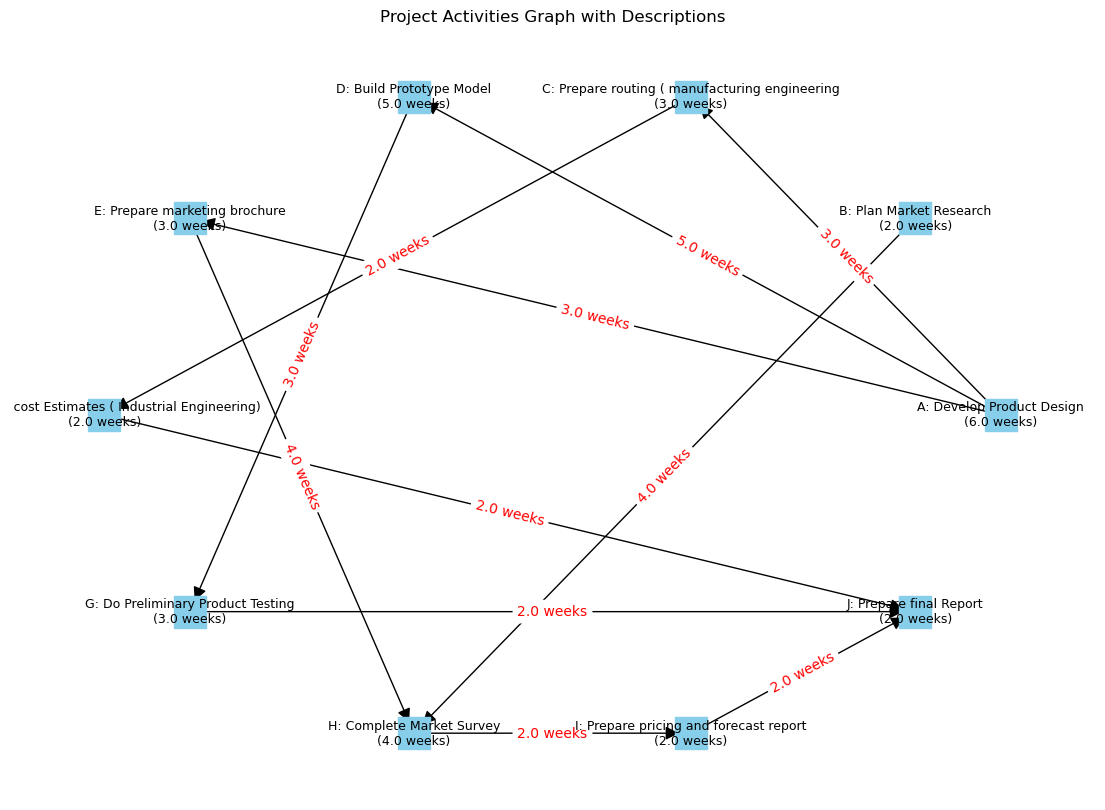

In [61]:
# Drawing the graph with rectangular nodes and including activity descriptions

plt.figure(figsize=(14, 10))

# Using the same positions for consistency but adjusting for readability
pos = nx.circular_layout(G)

# Draw the graph using rectangular nodes
nx.draw_networkx_nodes(G, pos, node_shape='s', node_size=500, node_color="skyblue")
nx.draw_networkx_edges(G, pos, arrows=True,arrowsize=20)

# Labels with activity descriptions
labels = {node: f"{node}: {data['description']}\n({data['time']} weeks)" for node, data in G.nodes(data=True)}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=9)

# Draw edge labels to show durations directly on the edges
edge_labels = {(u, v): f"{G.nodes[v]['time']} weeks" for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.5, font_color='red')

plt.title('Project Activities Graph with Descriptions')
plt.axis('off')  # Turn off the axis
plt.show()


In [62]:
import pandas as pd

# Initialize ES and EF with 0 for start activities and max possible value for others
for node in G.nodes:
    G.nodes[node]['ES'] = 0 if not list(G.predecessors(node)) else float('inf')
    G.nodes[node]['EF'] = 0

# Calculate ES and EF
for node in nx.topological_sort(G):
    predecessors = list(G.predecessors(node))
    if predecessors:
        G.nodes[node]['ES'] = max(G.nodes[p]['EF'] for p in predecessors)
    G.nodes[node]['EF'] = G.nodes[node]['ES'] + G.nodes[node]['time']

# Initialize LF and LS with EF for end activities for backward pass
max_ef = max(G.nodes[node]['EF'] for node in G.nodes)
for node in G.nodes:
    G.nodes[node]['LF'] = max_ef
    G.nodes[node]['LS'] = float('inf')

# Calculate LF and LS
for node in reversed(list(nx.topological_sort(G))):
    successors = list(G.successors(node))
    if successors:
        G.nodes[node]['LF'] = min(G.nodes[s]['LS'] for s in successors)
    G.nodes[node]['LS'] = G.nodes[node]['LF'] - G.nodes[node]['time']

# Calculate Slack and identify Critical Path
for node in G.nodes:
    G.nodes[node]['Slack'] = G.nodes[node]['LS'] - G.nodes[node]['ES']
    G.nodes[node]['Critical Path?'] = "Yes" if G.nodes[node]['Slack'] == 0 else ""

# Create DataFrame
df_columns = ['ES', 'LS', 'EF', 'LF', 'Slack', 'Critical Path?']
df_data = {col: [G.nodes[node][col] for node in G.nodes] for col in df_columns}
df = pd.DataFrame(df_data, index=G.nodes)

df


,ES,LS,EF,LF,Slack,Critical Path?
A,0.0,0.0,6.0,6.0,0.0,Yes
B,0.0,7.0,2.0,9.0,7.0,
C,6.0,10.0,9.0,13.0,4.0,
D,6.0,7.0,11.0,12.0,1.0,
E,6.0,6.0,9.0,9.0,0.0,Yes
F,9.0,13.0,11.0,15.0,4.0,
G,11.0,12.0,14.0,15.0,1.0,
H,9.0,9.0,13.0,13.0,0.0,Yes
I,13.0,13.0,15.0,15.0,0.0,Yes
J,15.0,15.0,17.0,17.0,0.0,Yes


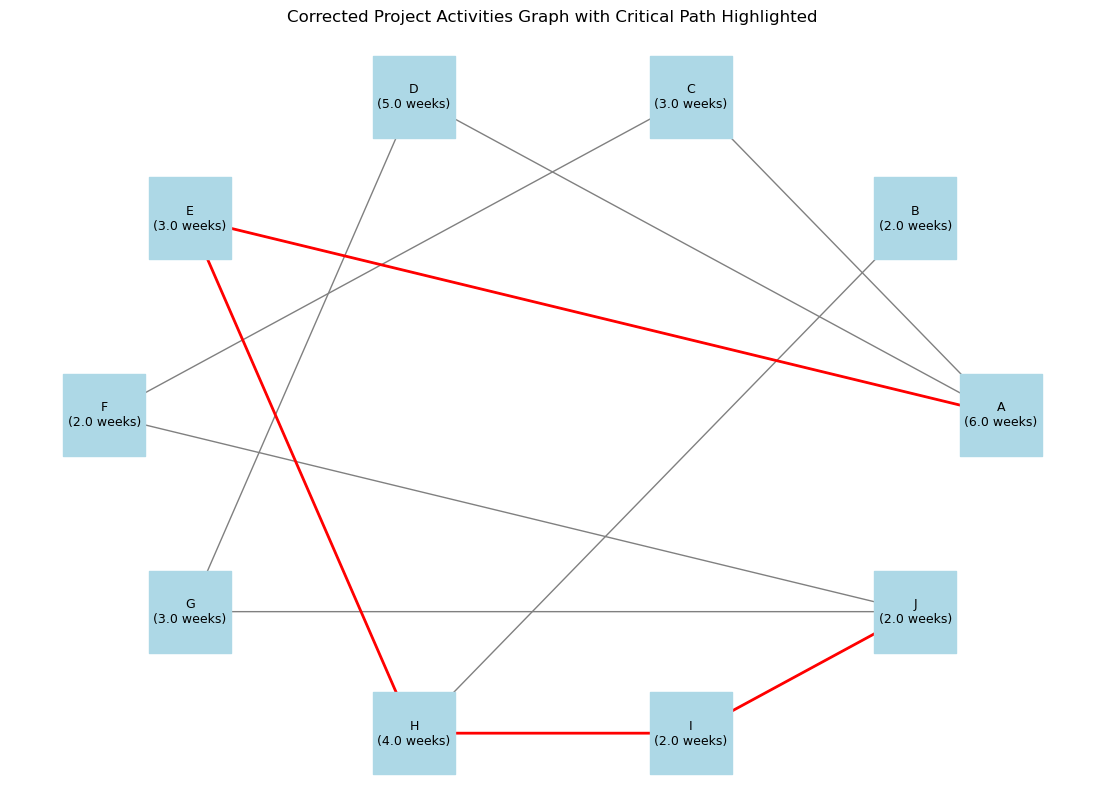

In [63]:
# Correcting the graph to ensure only the actual critical path edges are thicker and red
# We need to specifically identify edges that lead into nodes on the critical path where the predecessor is also on the critical path

# Recalculate critical path edges correctly considering both node and its predecessor must be on the critical path
actual_critical_path_edges = [(u, v) for u, v in G.edges if G.nodes[u]['Critical Path?'] == 'Yes' and G.nodes[v]['Critical Path?'] == 'Yes']

plt.figure(figsize=(14, 10))

# Draw the graph with rectangular nodes again
nx.draw_networkx_nodes(G, pos, node_shape='s', node_size=3500, node_color="lightblue")
nx.draw_networkx_labels(G, pos, labels={node: f"{node}\n({G.nodes[node]['time']} weeks)" for node in G.nodes}, font_size=9)

# Draw all edges with standard width and color
nx.draw_networkx_edges(G, pos, arrows=True, arrowstyle='-|>', edge_color='gray', width=1)

# Now draw only the actual critical path edges with thicker width and red color
nx.draw_networkx_edges(G, pos, edgelist=actual_critical_path_edges, arrows=True, arrowstyle='-|>', edge_color='red', width=2)

plt.title('Corrected Project Activities Graph with Critical Path Highlighted')
plt.axis('off')  # Turn off the axis for a cleaner look
plt.show()


In [68]:
df3=df.reset_index()
df3=df3.rename(columns={'index':'activities'})

In [69]:
df1

,activities,description,predecessors,Optimistic(a),Most Probable(m),Pessimistic(b),time,Variance
0,A,Develop Product Design,NaN,4.0,5.0,12.0,6.0,1.78
1,B,Plan Market Research,NaN,1.0,1.5,5.0,2.0,0.44
2,C,Prepare routing ( manufacturing engineering,A,2.0,3.0,4.0,3.0,0.11
3,D,Build Prototype Model,A,3.0,4.0,11.0,5.0,1.78
4,E,Prepare marketing brochure,A,2.0,3.0,4.0,3.0,0.11
5,F,Prepare cost Estimates ( Industrial Engineering),C,1.5,2.0,2.5,2.0,0.03
6,G,Do Preliminary Product Testing,D,1.5,3.0,4.5,3.0,0.25
7,H,Complete Market Survey,"[B, E]",2.5,3.5,7.5,4.0,0.69
8,I,Prepare pricing and forecast report,H,1.5,2.0,2.5,2.0,0.03
9,J,Prepare final Report,"[F, G, I]",1.0,2.0,3.0,2.0,0.11


In [71]:
df4=pd.merge(df3,df1,on='activities',how='inner')
df4

,activities,ES,LS,EF,LF,Slack,Critical Path?,description,predecessors,Optimistic(a),Most Probable(m),Pessimistic(b),time,Variance
0,A,0.0,0.0,6.0,6.0,0.0,Yes,Develop Product Design,NaN,4.0,5.0,12.0,6.0,1.78
1,B,0.0,7.0,2.0,9.0,7.0,,Plan Market Research,NaN,1.0,1.5,5.0,2.0,0.44
2,C,6.0,10.0,9.0,13.0,4.0,,Prepare routing ( manufacturing engineering,A,2.0,3.0,4.0,3.0,0.11
3,D,6.0,7.0,11.0,12.0,1.0,,Build Prototype Model,A,3.0,4.0,11.0,5.0,1.78
4,E,6.0,6.0,9.0,9.0,0.0,Yes,Prepare marketing brochure,A,2.0,3.0,4.0,3.0,0.11
5,F,9.0,13.0,11.0,15.0,4.0,,Prepare cost Estimates ( Industrial Engineering),C,1.5,2.0,2.5,2.0,0.03
6,G,11.0,12.0,14.0,15.0,1.0,,Do Preliminary Product Testing,D,1.5,3.0,4.5,3.0,0.25
7,H,9.0,9.0,13.0,13.0,0.0,Yes,Complete Market Survey,"[B, E]",2.5,3.5,7.5,4.0,0.69
8,I,13.0,13.0,15.0,15.0,0.0,Yes,Prepare pricing and forecast report,H,1.5,2.0,2.5,2.0,0.03
9,J,15.0,15.0,17.0,17.0,0.0,Yes,Prepare final Report,"[F, G, I]",1.0,2.0,3.0,2.0,0.11


In [80]:
Expected_project_completion_time = df4[df4['Critical Path?']=='Yes']['time'].sum()
Expected_project_completion_time
mu=Expected_project_completion_time
mu

17.0

In [81]:
Variance_of_project = df4[df4['Critical Path?']=='Yes']['Variance'].sum()
Variance_of_project

2.7199999999999998

In [82]:
sd = np.sqrt(Variance_of_project)
sd

1.649242250247064

In [83]:
# Upper and Lower Limit of Project Completion time
# at 95% confidence Z = 1.96
# Upper Limit = mu+Z*sd
# Lower Limite = mu-Z*sd

In [84]:
Upper_Limit= mu+1.96*sd
Lower_Limit = mu-1.96*sd
print(Upper_Limit,Lower_Limit)

20.232514810484247 13.767485189515755


In [85]:
# So the project will take anywhere between 13 to 20 weeks